## Selección del Área para el Parque Nacional Cerro Saroche

**PROYECTO:** SISTEMA PARA EL SEGUIMIENTO DE ECOSISTEMAS VENEZOLANOS \
**AUTOR:** Javier Martinez

#### Polígono del parque y Google Earth Engine

In [1]:
import ee
import numpy as np

# iniciando ee
ee.Initialize()

# parque
polygonCollection = 'WCMC/WDPA/current/polygons'
polygonName = 'Cerro Saroche'

# poligono
polygon = ee.FeatureCollection(polygonCollection) \
            .filter(ee.Filter.eq('NAME', polygonName))

In [2]:
# projection del poligono
polygon.geometry().projection().getInfo()

{'type': 'Projection', 'crs': 'EPSG:4326', 'transform': [1, 0, 0, 0, 1, 0]}

#### Creando Objeto Geopandas

In [3]:
import json
import geopandas

# lectura en geopandas
geoJson_polygon = json.dumps( polygon.geometry().getInfo() )
geopandas_polygon = geopandas.read_file(geoJson_polygon)

# guardando poligono
geopandas_polygon.to_file("./cerro_saroche/cerro_saroche.shp")

# viendo crs
geopandas_polygon.crs

/media/javier/Compartida/doctorado/gee-metview/env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Grilla Copernicus y Metview

In [4]:
import metview as mv

mv.setoutput('jupyter', output_font_scale=1.5, plot_widget=False)

In [5]:
# Área del parque delimitada 
park_area = [10.41, -70.03, 9.91, -69.23] # S,W,N,E

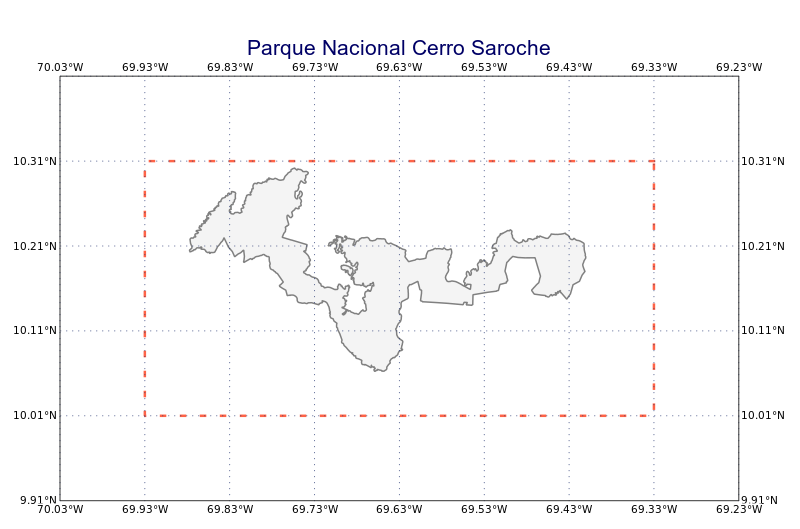

In [6]:
#-------------------------
coastlines = mv.mcoast(
                    map_grid_colour              = "RGB(0.1358,0.201,0.4367)",
                    map_grid_latitude_increment=0.1,
                    map_grid_longitude_increment=0.1,
                    map_grid_latitude_reference=10.31,
                    map_grid_longitude_reference=-69.83,
                    map_grid_line_style="dot",
                    map_label_height=0.3,
                    )

view = mv.geoview(
                map_area_definition = "corners",
                area                = park_area,
                coastlines          = coastlines
                )
#-------------------------
# poligono
poligono_coords = list(geopandas_polygon.exterior.geometry.iloc[0].coords)

latPos = [x[1] for x in poligono_coords]
lonPos = [x[0] for x in poligono_coords]
incr = 1

pltLst = []

# define visualiser
vis = mv.mvl_geopolyline(latPos, lonPos, incr)
graph_area_park = mv.mgraph(
                        graph_type="area",
                        graph_shade_colour="RGB(245,245,245)",
                        graph_line_colour="RGB(128,128,128)",
                        graph_line_thickness="3",
                        graph_line_style="solid",
                    )

pltLst.extend([vis, graph_area_park])
#-------------------------
# rectangulo
latPos = [10.31,10.01,10.01,10.31,10.31]
lonPos = [-69.93,-69.93,-69.33,-69.33,-69.93]
incr = 1

# define visualiser
vis = mv.mvl_geopolyline(latPos, lonPos, incr)
graph_area = mv.mgraph(
                  graph_type="curve",
                  graph_line_colour="RGB(255,99,71)",
                  graph_line_thickness="5",
                  graph_line_style="chain_dot",
              )


pltLst.extend([vis, graph_area])

# titulo
title = mv.mtext(
    text_lines=['Parque Nacional Cerro Saroche'],
    text_font_size=0.6,
    text_justification='centre',
    text_orientation='horizontal'
    )
mv.plot(view, pltLst,title)